In [52]:
# imports
import networkx as nx
import pickle
import heapq
import random
import matplotlib.pyplot as plt
import numpy as np

In [65]:
# init
centralities = {}
graphs = {}
prefix = "datasets/"
files = ["email-Eu-core.txt","collaboration.edgelist.txt","phonecalls.edgelist.txt","email.edgelist.txt"]
key_names = ["eu", "collab", "phone", "email"]

# get all graphs
for file_name, key_name in zip(files, key_names[:4]):
    graphs[key_name] = nx.read_edgelist(prefix+file_name)
# graphs["er1k"] = pickle.load(open("erdos_renyi_graph1000_0.1.pkl", "rb"))
# graphs["er10k"] = pickle.load(open("erdos_renyi_graph10000_0.1.pkl", "rb"))

def get_largest_cc(G):
    return max(nx.connected_components(G), key=len)

for key in graphs:
    graphs[key] = nx.subgraph(graphs[key], get_largest_cc(graphs[key]))
    nx.write_gexf(graphs[key], key+".gexf")

In [ ]:
# get all centrality dictionaries and restrict them just to the relevant subgraph
centralities["collab"] = pickle.load(open("collaboration.edgelist.txt.pkl", "rb"))
centralities["eu"] = pickle.load(open("email-Eu-core.txt.pkl", "rb"))
centralities["email"] = pickle.load(open("email.edgelist.txt.pkl", "rb"))
centralities["phone"] = pickle.load(open("phonecalls.edgelist.txt.pkl", "rb"))
centralities["er1k"] = pickle.load(open("erdos_renyi_centralities1000.pkl", "rb"))
centralities["er10k"] = pickle.load(open("erdos_renyi_centralities10000.pkl", "rb"))

In [36]:
for key in centralities:
    for cent in centralities[key]:
        centralities[key][cent] = {k:v for k,v in centralities[key][cent].items() if k in graphs[key]}

{'collab': {'degree': {'0': 0.00012969047207331836,
   '1680': 0.0003458412588621823,
   '6918': 0.00021615078678886393,
   '19642': 0.00021615078678886393,
   '1': 0.0003458412588621823,
   '4131': 0.0007349126750821373,
   '5645': 0.0018588967663842298,
   '6356': 0.004452706207850597,
   '7283': 0.0019021269237420027,
   '7716': 0.0006916825177243646,
   '11389': 0.0032422618018329587,
   '19612': 0.003285491959190732,
   '21928': 0.0013401348780909563,
   '2': 8.646031471554557e-05,
   '3335': 0.002464118969393049,
   '4598': 0.0003458412588621823,
   '3': 0.00017292062943109114,
   '8041': 0.000821372989797683,
   '10350': 0.00017292062943109114,
   '12415': 0.0003458412588621823,
   '20592': 0.0009078333045132285,
   '4': 0.00021615078678886393,
   '1694': 0.0002593809441466367,
   '5811': 0.0005619920456510462,
   '12408': 0.0003458412588621823,
   '13191': 0.0002593809441466367,
   '17576': 0.0014698253501642747,
   '5': 8.646031471554557e-05,
   '2372': 0.00017292062943109114,

In [59]:
# get top nodes using heapq
def get_top_nodes(centrality_dict, n=3):
    return heapq.nlargest(n, centrality_dict, key=centrality_dict.get)

In [60]:
def simulate(graph_key, centrality, p=0.5):
    # get top nodes from nx graph
    graph, centrality_dict = graphs[graph_key], centralities[graph_key][centrality]
    print(centrality_dict)
    top_nodes = get_top_nodes(centrality_dict)

    # get all nodes from nx graph
    all_nodes = graph.nodes()

    # initialize a dictionary "infected" where all nodes are not infected except top nodes
    infected = {}
    for node in all_nodes:
        infected[node] = False
    for node in top_nodes:
        infected[node] = True

    # initialize time step
    time_step = 0

    # infection counter
    infected_count = [sum(infected.values())]

    # while not all nodes are infected:
    while not all(infected.values()):
        # print time step every 5
        if time_step % 5 == 0:
            print("Time step:", time_step)

        # infect neighbors with probability p
        for node in all_nodes:
            if infected[node]:
                neighbors = graph.neighbors(node)
                for neighbor in neighbors:
                    if not infected[neighbor]:
                        if random.random() < p:
                            infected[neighbor] = True

        # count total number of infected nodes and print
        total_infected = sum(infected.values())
        print("Total infected nodes:", total_infected)
        infected_count.append(total_infected)

        # increment time step
        time_step += 1

    # plot
    plt.plot(np.array(infected_count) / len(all_nodes))
    plt.show()


{'0': 0.42199107500130484, '1': 0.4223599483186137, '2': 0.46148976205968867, '3': 0.44166341944834925, '4': 0.46215187075704833, '5': 0.5014839448640311, '6': 0.4758048063776406, '7': 0.42015633119695134, '8': 0.41315073183111933, '9': 0.3561959313501615, '10': 0.4424723268099762, '11': 0.4312180105992807, '12': 0.43315085690407357, '13': 0.503050266399265, '14': 0.44206750308919857, '15': 0.4298752498901192, '16': 0.45799031362700854, '17': 0.46979074465385906, '18': 0.44206750308919857, '19': 0.4414616545239781, '20': 0.45199231139054635, '21': 0.4878140140095851, '22': 0.3792619944085511, '23': 0.45135897326155444, '24': 0.39817040039266094, '25': 0.4138584846907872, '26': 0.3815079201551473, '27': 0.43025804174220306, '28': 0.46729185771421083, '29': 0.4414616545239781, '30': 0.4432842026389854, '31': 0.418156452511029, '32': 0.38747376172934567, '33': 0.39346887693525573, '34': 0.38256514717062073, '35': 0.4418653688856827, '36': 0.4325691861025014, '37': 0.38950405552317136, '38

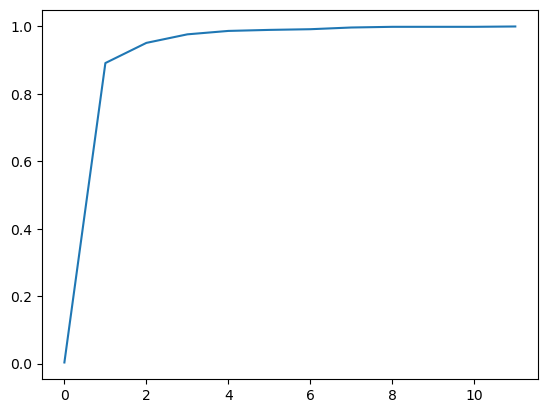

Done with eu

{'0': 0.15622474389421714, '1680': 0.1880289729975711, '6918': 0.17287783721244188, '19642': 0.17287783721244188, '1': 0.18996452276390655, '4131': 0.19461206455672564, '5645': 0.21531565645415535, '6356': 0.2272772239309919, '7283': 0.21773490679101318, '7716': 0.19287299583490905, '11389': 0.22288621224944544, '19612': 0.21908418857222686, '21928': 0.20010382569519167, '2': 0.18806661607674427, '3335': 0.23614076633013928, '4598': 0.19383571206777928, '3': 0.1759022359338936, '8041': 0.18097734746099872, '10350': 0.1759022359338936, '12415': 0.17604822331479664, '20592': 0.21583863893462912, '4': 0.18153023989386663, '1694': 0.18153191033556176, '5811': 0.18889316774693035, '12408': 0.1852445749054986, '13191': 0.18153191033556176, '17576': 0.2233783517900465, '5': 0.15437990186630798, '2372': 0.1645900629076588, '8339': 0.18293754240183022, '6': 0.13849645998305368, '2095': 0.1384954876755019, '19215': 0.12043538049209815, '22028': 0.1629262463453376, '7': 0.1970005268

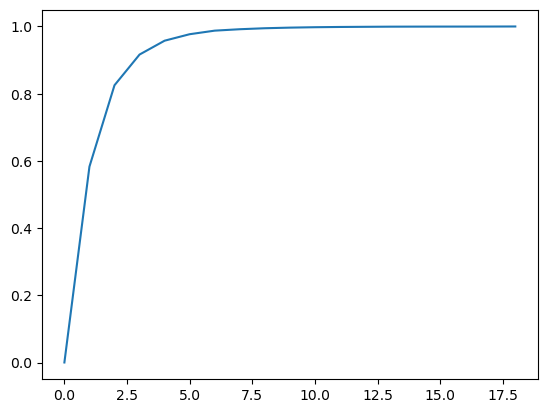

Done with collab

{'0': 0.11911004787492831, '1': 0.12175340748556163, '2': 0.10719308485839454, '3': 0.1135974229801315, '4': 0.10744131505146191, '5': 0.10475247805780076, '6': 0.10890121612035042, '7': 0.10461942188881194, '8': 0.10445562585579785, '9': 0.11031608528892828, '10': 0.10905903307836075, '11': 0.10418233841108655, '12': 0.10698627097930344, '13': 0.10730043441888348, '14': 0.10418319691404207, '15': 0.1243000740974227, '16': 0.10876583967471065, '17': 0.10915742994045426, '18': 0.10661502111732214, '19': 0.10994387222668989, '20': 0.10418233841108655, '21': 0.10772969650011038, '22': 0.10548399832056705, '23': 0.10450656802648584, '24': 0.10503182264052739, '25': 0.10683394035708392, '26': 0.11410079451568923, '27': 0.10665909307857245, '28': 0.10418233841108655, '29': 0.11293380187411582, '30': 0.10418233841108655, '31': 0.10955232472062289, '32': 0.10418233841108655, '33': 0.10528109042292488, '34': 0.10418319691404207, '35': 0.11055918487786458, '36': 0.1041823384110

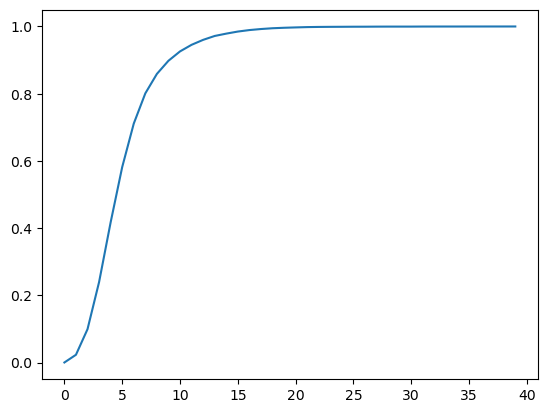

Done with phone

{'0': 0.3301828264897166, '1': 0.34375512318856477, '63': 0.33407560865233304, '144': 0.32814033474576976, '196': 0.3450756441084582, '384': 0.3271218431848534, '10589': 0.29913503386279783, '14267': 0.33419929898135353, '14706': 0.3408096914292941, '23186': 0.2562662402416947, '6': 0.3421975872266545, '125': 0.3444554552238661, '9826': 0.3393959549900634, '10970': 0.2542462965446471, '12604': 0.26635798812139305, '12838': 0.339929891396145, '13111': 0.2542462965446471, '15118': 0.2542462965446471, '15303': 0.2542462965446471, '21224': 0.2554462612639173, '21938': 0.25435145010894916, '22751': 0.2542462965446471, '23630': 0.2542462965446471, '30169': 0.2558386338960325, '37288': 0.2542462965446471, '37780': 0.2542462965446471, '38389': 0.2542462965446471, '38392': 0.2542462965446471, '40106': 0.2542462965446471, '40276': 0.2542462965446471, '41084': 0.2542462965446471, '41422': 0.2542462965446471, '41794': 0.2542462965446471, '44203': 0.2542462965446471, '44227': 0.254

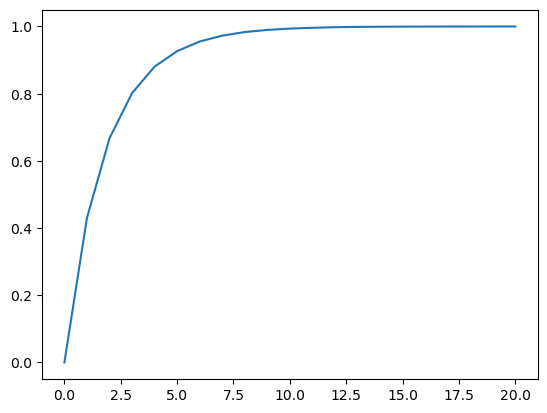

Done with email

{0: 0.5268987341772152, 1: 0.5288512440444679, 2: 0.5266209804955192, 3: 0.5241343126967472, 4: 0.5288512440444679, 5: 0.5252365930599369, 6: 0.5252365930599369, 7: 0.5227629513343799, 8: 0.529973474801061, 9: 0.5296924708377518, 10: 0.5235849056603774, 11: 0.5277337559429477, 12: 0.5195007800312013, 13: 0.5249605885444035, 14: 0.5260663507109005, 15: 0.523859465128474, 16: 0.5246848739495799, 17: 0.5302547770700637, 18: 0.5249605885444035, 19: 0.5233106338397067, 20: 0.5277337559429477, 21: 0.5227629513343799, 22: 0.5260663507109005, 23: 0.5230366492146596, 24: 0.5274551214361141, 25: 0.5263435194942044, 26: 0.523859465128474, 27: 0.5241343126967472, 28: 0.5266209804955192, 29: 0.5244094488188976, 30: 0.5288512440444679, 31: 0.5219435736677116, 32: 0.5288512440444679, 33: 0.5282919090428345, 34: 0.5257894736842105, 35: 0.5296924708377518, 36: 0.5249605885444035, 37: 0.5280126849894292, 38: 0.5271767810026385, 39: 0.5291313559322034, 40: 0.5257894736842105, 41: 0.52440

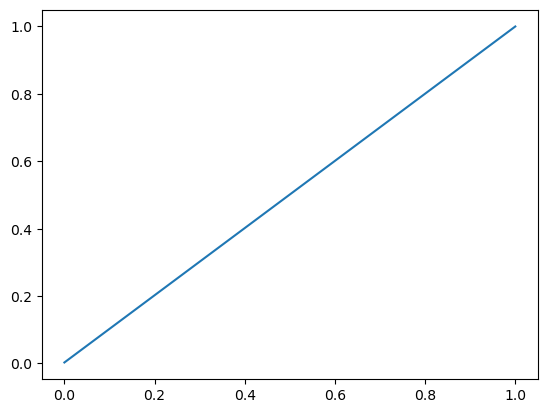

Done with er1k

{0: 0.526900985403383, 1: 0.5254611382626517, 2: 0.5267067003792667, 3: 0.5263462651997683, 4: 0.5284883720930232, 5: 0.5254059166622879, 6: 0.5247717014800042, 7: 0.5239467616851813, 8: 0.5252679134271906, 9: 0.5272065801961404, 10: 0.527178784204144, 11: 0.5266512166859791, 12: 0.5262908574135481, 13: 0.5259033293010046, 14: 0.5268732216250395, 15: 0.526152388970743, 16: 0.5267899478425794, 17: 0.527679560926698, 18: 0.5245239469128679, 19: 0.5259309909530823, 20: 0.5252403214792246, 21: 0.5250196902074035, 22: 0.5261800768299743, 23: 0.5262908574135481, 24: 0.5254059166622879, 25: 0.5275681950087058, 26: 0.5259309909530823, 27: 0.5259033293010046, 28: 0.5258756705585358, 29: 0.5255439924314097, 30: 0.5259033293010046, 31: 0.5250748306464318, 32: 0.5252127324298771, 33: 0.5268454607724327, 34: 0.5264848357203032, 35: 0.5272343791194305, 36: 0.5268454607724327, 37: 0.5268177028451001, 38: 0.5279860597739994, 39: 0.5252679134271906, 40: 0.5272899857617466, 41: 0.5249645

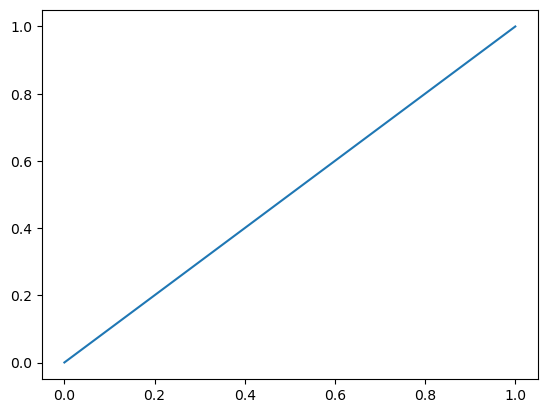

Done with er10k



In [61]:
for key in graphs:
    simulate(key, "closeness", 0.4)
    print("Done with", key)
    print("")